In [92]:
# realizo la importacion de las librerias con las que se 
# trabajara
import pandas as pd # pandas para el manejo de datasets
import numpy as np # numpy para el manejo de vectores
import seaborn as sns # para graficar
import matplotlib.pyplot as plt # graficas

In [93]:
# ahora traemos las bases con las que trabajaremos
e = pd.read_csv('C:\\Users\\Dell\\Downloads\\EjercicioDS\\klustera\\e.csv')
v = pd.read_csv('C:\\Users\\Dell\\Downloads\\EjercicioDS\\klustera\\v.csv')
# quedaron importados, no tenemos ningun error -> ya vienen en utf-8. Pero si no fuera asi:
# este momento es ideal de especificar el encoding

1. Conocer los .CVS

Estos datos fueron captados con sensores de rastreo por la posicion de un celular mediante wifi.

Suena a datos captados cuando te conectas al wifi de un Starbucks. (analogia personal para acercarme al problema)

Para la segunda ocasion tu celular puede conectarse, pero no significa que estes usando la conexion. Puedo restringir la condicion a: tomar como conexion que el celular haga uso del wifi sin especificar si es con o sin intencion del usuario.  Mas tarde se verá que lo que hace a un visitante ser un visitante es su tiempo de sesión > 0, pero tambien que al menos tenga dos conexiones en el intervalo de medicion. Es decir, una persona que solo se conecto una sola vez al wifi, hizo uso de los datos o no, no será considerado como visitor = True.

+ **device_mac**:  identificador único de un celular, cada célula es una persona
+ **branch_office**: es la sucursal de cliente
+ **visitor**-> variable indicadora:  true significa que es visitante del lugar y false que no
+ **tiempodeses**: es el tiempo de la sesión (en SEGUNDOS)


In [94]:
# vistazo a los datasets
e.sample(5)
# veo indices muy altos ¿cuantos registros hay?
# hay una columna que no tiene nombre pero almacena los indices
# del [1, n]. Como python empieza desde 0 los inidices
# deberian de estar un numero antes del [0, n-1], 
# Confirmo que los indices automaticos de python corresponden con
# los del .csv por lo que puede analizarse eliminar esa columna "unnamed: 0". 
# Nota: revisar si es importante el indice para unir ambos dataframe. Mas tarde 
# puedo confirmar que la otra base no añade columnas a la primera, sino
# registros, por ello sí es posible eliminar la columna. 

# el registro 249432 tiene un valor extraño para el device_mac porque alamcena: "Ion". 
# hay que revisar con cuidado su significado

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
217425,217426,e4:a4:71:00:4f:7e,1,11,3,Thursday,10,True,180
169337,169338,ac:bc:32:82:60:11,1,11,23,Wednesday,22,False,0
75947,75948,50:9e:a7:92:fd:26,3,11,29,Tuesday,18,False,0
18378,18379,10:68:3f:71:b5:6c,1,11,16,Wednesday,11,False,0
33721,33722,24:00:ba:cf:6e:d1,3,11,24,Thursday,12,False,0


In [95]:
# voy a eliminar la columna de indices y me quedo con los que maneja python
e = e.drop(['Unnamed: 0'], axis = 1)
# para elminar uso: .drop(['', axis=]) indico dentro el nombre de la columna, despues el axis
v = v.drop(['Unnamed: 0'], axis = 1)

In [96]:
v.sample(5) #vistazo rapido para entrar en contexto con la base

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses
74951,a8:81:95:6e:f7:d2,3,11,7,Monday,21,21839
39306,ec:1f:72:a5:c1:ac,1,10,31,Monday,8,0
47235,14:f4:2a:c3:8a:1c,1,11,6,Sunday,16,0
41770,14:36:c6:c4:0a:3b,3,11,9,Wednesday,23,0
88540,9c:5c:f9:6f:11:6b,1,10,27,Thursday,17,34759


# Descripcion:

In [225]:
# revisar el problema de nulos
ev.isnull().count()
# no hay nulos

device_mac        339556
branch_office     339556
month_tz          339556
day_tz            339556
day_of_week_tz    339556
hour_tz           339556
visitor           339556
tiempodeses       339556
dtype: int64

In [226]:
# analisis descriptivo de la base de datos e
ev.describe()
# la unica variable de la cual tiene sentido obtener sus
# estadisticas es del tiempo de sesion. Las conclusiones 
# para las demas columnas son las siguientes:
# hay 31 dias, 3 oficinas, dos meses: octubre y noviembre
# 24 horas, de las 0 a las 23
# el promedio del tiempo de sesion es de 2378.26 segundos
# sin embargo hay que revisarlo porque al ser media
# esta siendo afectada por outlayers

,branch_office,month_tz,day_tz,hour_tz,tiempodeses
count,339556.000000,339556.000000,339556.000000,339556.000000,339556.000000
mean,1.884481,10.875537,14.802059,13.640386,2378.268135
std,0.942636,0.330109,9.459843,5.276101,8059.514529
min,1.000000,10.000000,1.000000,0.000000,0.000000
25%,1.000000,11.000000,7.000000,10.000000,0.000000
50%,1.000000,11.000000,13.000000,14.000000,0.000000
75%,3.000000,11.000000,24.000000,18.000000,422.000000
max,3.000000,11.000000,31.000000,23.000000,68062.000000


In [97]:
# obtener el nombre de las columnas:
print('El nombre de las columnas de la base e, es: ', sorted(e.columns))
# nota: el nombre de las columnas se ve bien, no tiene espacios en 
# blanco, parece que pueden manejarse sin problema

print('El nombre de las columnas de la base v, es: ', sorted(v.columns))

# la unica difetencia entre ambas bases de datos es una columna: la de visitor. En la base v  no viene. 
# Es parte del problema hallar como se determina esta columna y agregarla. 

El nombre de las columnas de la base e, es:  ['branch_office', 'day_of_week_tz', 'day_tz', 'device_mac', 'hour_tz', 'month_tz', 'tiempodeses', 'visitor']
El nombre de las columnas de la base v, es:  ['branch_office', 'day_of_week_tz', 'day_tz', 'device_mac', 'hour_tz', 'month_tz', 'tiempodeses']


In [191]:
print('¿Qué meses existen? ', ev.month_tz.unique())
# es decir esta base solo hizo mediciones para los meses de 
# OCTUBRE y NOVIEMBRE
# esto me da una idea de la posible estacionalidad del comportamiento de las personas
# ¿por que estos meses en particular?

¿Qué meses existen?  [11 10]


In [192]:
#sorted(ev.day_tz.unique()) # rango: [1,31], concluyo que 
# nada fuera de lo comun en la serie de dias

In [193]:
ev.day_of_week_tz.unique() # hay 7 dias de la semana

array(['Wednesday', 'Sunday', 'Friday', 'Thursday', 'Saturday', 'Tuesday',
       'Monday'], dtype=object)

In [194]:
# ¿cuantas oficinas hay?
print('Oficinas disponibles: ', end = '')
# solo hay 3 sucursales a las que pueden acudir los clientes
ev.branch_office.unique()


Oficinas disponibles: 

array([1, 3, 2], dtype=int64)

In [185]:
# ¿cuantos registros hay?
print('El numero de registros en la base e: ', e.shape[0])
print('El numero de columnas del dataset e es: ', e.shape[1])

# recordar que los indices en python inician desde 0
print('\n')
print('El numero de registros es en la base v: ', v.shape[0])
print('El numero de columnas del dataset v es: ', v.shape[1])

# la base v tiene una columna menos, se debe a que le falta la de 'visitor'
# para las demas columnas, contiene las mismas que la base e


El numero de registros en la base e:  249556
El numero de columnas del dataset e es:  8


El numero de registros es en la base v:  90000
El numero de columnas del dataset v es:  8


In [197]:
# sorted(ev.hour_tz.unique()) # rango [0, 23] ¿las oficinas estan 
# abiertas a las 24 hrs?
# practicamente tiene todas las horas del dia ¿por que? 
# Esto redirige el analisis, 
#  ¿ de que manera un usuario se conecta en la madrugada?
# surgen preguntas sobre la ubicacion del wifi y las 
# costumbres de los usuarios

Voy a agregar la columna faltante a la base v, para despues unirlas ambas y trabajar con solo una

In [99]:
frecuentes = v.device_mac.value_counts()[v.device_mac.value_counts() > 1 ].index
frecuentes

Index(['00:20:00:94:8e:d3', 'lon', '00:23:68:b2:58:a7', '64:66:b3:ba:6d:fc',
       '68:b5:99:8d:05:07', '9c:8e:99:07:48:5d', '8c:0c:90:d2:dd:6b',
       '8c:0c:90:12:dd:68', '8c:0c:90:52:dd:68', 'd0:e7:82:f5:be:c0',
       ...
       'ec:1f:72:31:60:32', 'ec:1f:72:3a:29:f0', '88:70:8c:47:57:38',
       '28:27:bf:29:7c:a3', '38:c9:86:e9:30:bc', 'e4:58:b8:22:7f:d7',
       'f4:dc:f9:d3:1d:39', '5c:8d:4e:45:fe:75', '84:7a:88:6b:e3:6e',
       '90:67:1c:76:1c:d7'],
      dtype='object', length=10174)

In [100]:
v['visitor'] = np.where((v.device_mac.isin(frecuentes)) & (v.tiempodeses >0) , True, False)

In [181]:
v.sample(5)

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses,visitor
73501,4c:66:41:6c:3d:e1,1,11,2,Wednesday,9,1553,False
19495,ac:38:70:60:8b:e1,3,11,15,Tuesday,8,0,False
11309,f8:e0:79:b4:93:2c,3,11,24,Thursday,11,169,False
14590,18:3a:2d:dd:84:90,3,11,15,Tuesday,21,0,False
32303,14:d1:1f:6e:3c:b3,1,11,12,Saturday,16,2092,True


En este paso voy a exportar la base de datos v con la columna visitor agregada. 

He nombrado v1 al .csv que ya contiene la columna visitor

In [182]:
# v.to_csv(r'C:\\Users\\Dell\\Downloads\\EjercicioDS\\klustera\\v1.csv')

### Uniré ambos .csv 

Para analizar los datos en conjunto y sus proporciones

In [102]:
ev = pd.concat([e, v], axis = 0)
ev.sample(5)

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
230081,ec:88:92:76:74:2e,3,11,30,Wednesday,11,False,0
6978,34:23:ba:21:37:cb,3,11,8,Tuesday,6,False,0
126520,84:51:81:ae:6a:27,1,11,9,Wednesday,19,False,0
137588,8e:64:6a:3d:52:5a,1,11,3,Thursday,9,False,0
234594,f0:25:b7:89:f3:e3,2,11,24,Thursday,14,True,678


In [103]:
print('Dimensiones del dataframe "ev" (union de ambos)', ev.shape)

Dimensiones del dataframe "ev" (union de ambos) (339556, 8)


In [120]:
# ¿el numero de celulas corresponde con el total de registros?
# es decir ¿hay varias visitas de una misma persona o todas son
# visitas diferentes?
print('Registros unicos en la base e: ', len(e.device_mac.unique()) )
# debido a que el total de registros no es igual con el total de datos unicos
# hubo al menos dos visitas por la misma persona en el registro
# es decir: la misma persona acudió a la sucursal mas de una vez.
# ¿fue a la misma sucursal o fue a otras?

Registros unicos en la base e:  125252


In [104]:
# Para ambas bases para visitantes y no visitantes:
# ¿cuantas personas hay que son unicas? 
print('Numero de personas unicas en ev: ', len(ev.device_mac.unique()))

total_registros = ev.shape[0]
personas_unicas = len(ev.device_mac.unique())
print('Personas que se conectaron 1 o al menos 1 vez al wifi: ', 
      round((personas_unicas / total_registros)* 100, 2),'%')
print('Personas que se conectaron 2 o mas veces al wifi: ', 
      100-round((personas_unicas / total_registros)* 100, 2),'%')
# En esta base de datos el 53.74% de las personas se conectaron dos o mas veces al wifi


Numero de personas unicas en ev:  157074
Personas que se conectaron 1 o al menos 1 vez al wifi:  46.26 %
Personas que se conectaron 2 o mas veces al wifi:  53.74 %


#### Base de datos unida y fitrada unicamente por visitantes frecuentes:

In [188]:
# debo separar entre visitantes y no visitantes
visitantes_frecuentes = ev[ev.visitor == True]
visitantes_frecuentes.sample(3)

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
102550,6c:94:f8:52:69:bc,2,11,28,Monday,19,True,1397
187075,c0:bd:d1:2a:42:86,3,11,10,Thursday,16,True,1474
7408,20:2d:07:df:5b:a7,1,10,28,Friday,20,True,262


In [189]:
visitantes_no_frecuentes = ev[ev.visitor == False]
visitantes_no_frecuentes.sample(3)

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
22397,14:3e:bf:f1:39:63,1,11,12,Saturday,17,False,0
74107,d8:c4:6a:92:fd:20,1,11,24,Thursday,15,False,0
162889,a4:ba:76:b0:cc:10,3,11,16,Wednesday,15,False,0


In [236]:
# tiempo de sesion promedio parra visitantes frecuentes
visitantes_frecuentes.tiempodeses.mean()

7172.306496335908

In [237]:
# tiempo de sesion promedio para visitantes no frecuentes
visitantes_no_frecuentes.tiempodeses.mean()

47.57461987587426

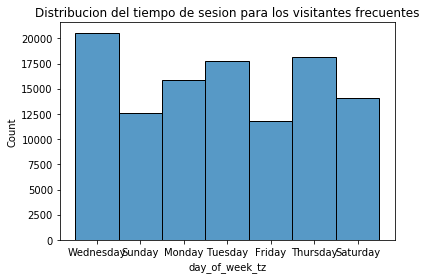

In [221]:
# aplico los siguientes filtros: De la base de datos unida por e y v, 
# con v incluyendo la columna de visitor: 1 quiero los visitantes frecuentes
# 2 solo quiero las conexiones con tiempo de sesion positiva

frecuentes_ysesion = visitantes_frecuentes[visitantes_frecuentes.tiempodeses > 0 ]
sns.histplot(frecuentes_ysesion.day_of_week_tz)
# se nota la siguiente distribucion:
# las conexiones mas bajas ocurren en domingo y viernes
# aumenta el tiempo de sesion conforme avanzan los dias
# hasta llegar al tiempo maximo en miercoles, a partir
# de este dia disminuye de nuevo hasta llegar al
# punto minimo del viernes 
# en sabado aumenta un poco el tiempo de sesion
# pero vuelve a caer para el domingo

# ¿como indicarle el orden de los dias al
# histograma? Para que pueda apreciarse la
# forma de la distribucion
plt.title('Distribucion del tiempo de sesion para los visitantes frecuentes');

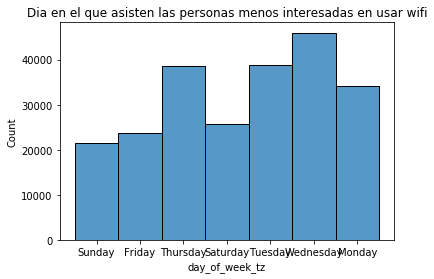

In [118]:
# ¿que dia prefieren conectarse las personas que no son visitantes frecuentes? Miercoles
sns.histplot(visitantes_no_frecuentes.day_of_week_tz)
plt.title('Dia en el que asisten las personas menos interesadas en usar wifi');


In [107]:
# visitantes_frecuentes # 85,244 registros 
# len(visitantes_frecuentes.device_mac.unique()) #27439 personas 
print('Personas que se conectaron 1 vez: ', round(27439/85244,2))
# el 30% de las conexiones son unicas, el restante 70% es gente que se volvio a conectar
# incluye las que se conectaron 1 o mas
print('Personas que se conectaron dos o mas veces: ', round(1 -(27439/85244), 2) )

Personas que se conectaron 1 vez:  0.32
Personas que se conectaron dos o mas veces:  0.68


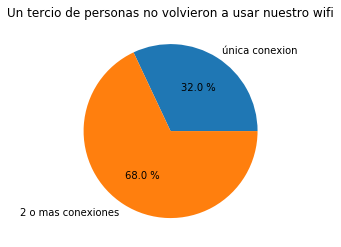

In [108]:
# aqui ya esta dividido para visitantes unicamente
porcentajes = [0.32, 0.68]
nombres = ['única conexion', '2 o mas conexiones']
plt.pie(porcentajes, labels= nombres, autopct = "%0.1f %%")
plt.title('Un tercio de personas no volvieron a usar nuestro wifi');

In [47]:
# ¿cuantas personas van a cada oficina?
# ¿que oficina es mas famosa?
# ¿cual oficina es la menos concurrida?
asistencia = visitantes_frecuentes.groupby(['branch_office'])
asistencia_branch = asistencia.device_mac.count()
asistencia_branch

branch_office
1    45012
2    13542
3    26690
Name: device_mac, dtype: int64

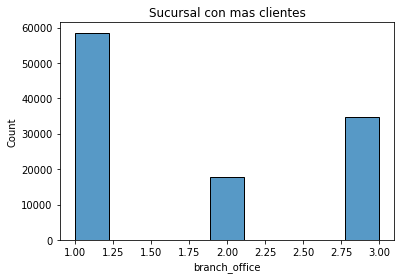

In [196]:
sns.histplot(visitantes_frecuentes.branch_office, bins = 9)
# la oficina con mas visitas es la 1
# la oficina con menos visitas es la 2
# ¿ a que se debe? Encontrar los factores que influyen en este flujo
plt.title('Sucursal con mas clientes');

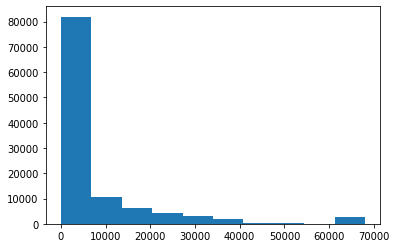

In [241]:
visitantes = ev[ev.visitor == True]
plt.hist(visitantes.tiempodeses);

In [190]:
# afluencia en porcentaje
# recordar separar entre visitor para que no afecte las conclusiones del analisis
print('Oficina y su porcentaje de asistencia ', round((asistencia_branch /total_visitantes_frecuentes)*100,2))
print('\n')
print('Oficina menos popular: ', 2)
print('\n')
print('Oficina con mas afluencia: ', 1)

Oficina y su porcentaje de asistencia  branch_office
1    40.52
2    12.19
3    24.03
Name: device_mac, dtype: float64


Oficina menos popular:  2


Oficina con mas afluencia:  1


### Siguiente paso: profundizar:

+ ¿qué sucursal tiene mas clientes?
+ ¿a que hora?
+ ¿por que a esa hora, por que esa sucursal?
+ ¿ a los clientes les gusta ir mas ahi? (pensando que sea un starbucks)
+ ¿les gusta ir o de hecho van mucho porque no les solucionan? (pensando que fuera una tienda de atencion al cliente)
+ ¿con los datos que tengo puedo inferir porque tienen mas usuarios esas sucursales?

+ ¿que hacen cuando van?
+ ¿ a que van?
+ ¿de que se trata esta base? ¿que mide? ¿cada cuanto? ¿ para que?

In [242]:
# promedio de minutos por sesion
sesion_promedio_s = ev.tiempodeses.mean()
sesion_promedio = round(sesion_promedio_s/60, 2)
print('Tiempo en minutos de una sesion promedio: ', sesion_promedio)
# NOTA: este promedio esta sesgado debido a los valores atipicos

Tiempo en minutos de una sesion promedio:  39.64


In [243]:
print('Tiempo minimo en segundos de una sesion: ', min(ev.tiempodeses))
print('Tiempo maximo de una sesion en horas: ', round(max(ev.tiempodeses)/3600,2))
# 18 horas? Es normal? hay un error?
# quiero hacer una grafica de dispersion para poder observar los
# valores atipicos, si son muchos o como estan distribuidos

Tiempo minimo en segundos de una sesion:  0
Tiempo maximo de una sesion en horas:  18.91


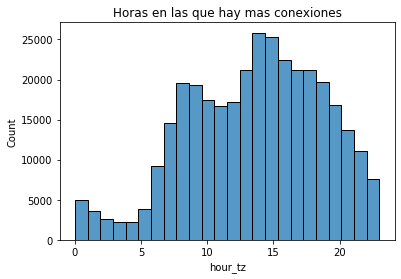

In [224]:
# ¿en que horario hay mas gente conectada?
sns.histplot(ev.hour_tz, bins = 24)
# tiene logica este comportamiento "humano"
plt.title('Horas en las que hay mas conexiones');
# entre las 2p y las 3 pm hay mas gente conectada

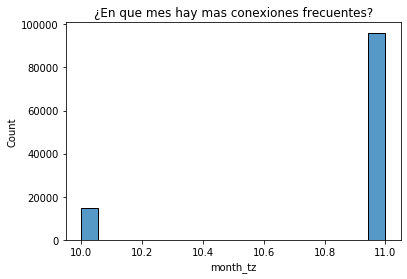

In [219]:
# ¿cual es el mes con mas conexiones?
sns.histplot(visitantes_frecuentes.month_tz)
plt.title('¿En que mes hay mas conexiones frecuentes?');
# totalmente hay mas visitas en NOVIEMBRE!!! ¿por que?
# ¿cuantas veces es mas grande noviembre vs octubre?

¿Cuantas horas duro la sesion mas larga?: 18.91


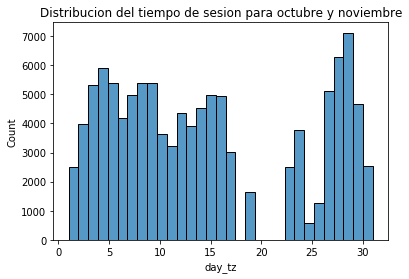

In [208]:
# tiempo de sesion para visitantes
sns.histplot(visitantes_frecuentes.day_tz, bins = 31)
plt.title('Distribucion del tiempo de sesion para octubre y noviembre')
print('¿Cuantas horas duro la sesion mas larga?:', round(max(visitantes_frecuentes.tiempodeses)/3600,2))

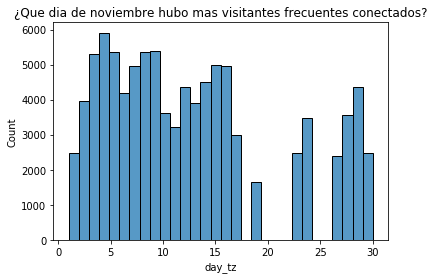

In [212]:
# separo por mes los visitantes y que dia se conectaron mas
# filtros: octubre, visitantes, sesion > 0
frecuentes_positivo = visitantes_frecuentes[visitantes_frecuentes.tiempodeses >0]
frecuentes_noviembre = frecuentes_positivo[frecuentes_positivo.month_tz == 11]
sns.histplot(frecuentes_noviembre.day_tz, bins = 30)
plt.title("¿Que dia de noviembre hubo mas visitantes frecuentes conectados?");
# el 4 de noviembre hubo mas visitantes frecuentes conectados
# ¿a que se debe esta concentracion de conexiones?
# hubo 7 dias que no se conectaron: 18, 20, 21, 22, 25, 26, 31 

#### Desarrollo del proceso para determinar si un usuario es o no visitante. 

¿cómo me di cuenta que era necesario tener mas de una conexion para ser visitante?

Porque analice la base e, intentando encontrar que era lo que los hacia visitantes, ademas del tiempo de sesion positivo, despues me pregunte si podian ser en fin de semana: no importaba el dia, el mes, e incluso habia registros que eran visitantes con tiempo de sesion = 0. 

Me detuve a analizar un registro en particular que tuviera todos los casos: como los registros estaban ordenados de acuerdo con la fecha de captura, me di cuenta de que un device_mac iniciaba con tiempo de sesion, usaba la conexion wifi y cuando se desconectaba volvia a valer 0. Entonces, era necesario tener mas de dos conexiones para poder abrir, usar y cerrar para poderse considerar un visitante: FRECUENTE. 

In [235]:
 # ¿que significa ser visitante?
e.visitor.unique()
# solo puede tomar uno de los siguientes dos valores: True, False

array([ True, False])

In [234]:
e[(e.day_of_week_tz == 'Sunday') | (e.day_of_week_tz == 'Saturday')].sample(8)
# Conslusion: 1. Puedes ser visitante en domingo, ¿puedes ser visitante en sabado?

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
90857,60:be:b5:9c:a5:00,3,11,5,Saturday,17,False,0
196738,d0:13:fd:13:51:d1,3,11,6,Sunday,13,False,0
69700,48:5a:b6:b3:aa:de,2,11,5,Saturday,23,True,21701
165660,a8:9f:ba:aa:d3:51,3,11,12,Saturday,23,False,33
17068,0c:d7:46:74:fc:61,1,10,29,Saturday,15,True,418
160526,a4:70:d6:85:db:f6,3,11,13,Sunday,10,False,0
167385,ac:0d:1b:fe:bc:0c,1,11,6,Sunday,7,True,1797
176369,b4:52:7e:cc:d1:57,3,11,13,Sunday,15,True,6374


In [240]:
# tiempo de sesion >0 pero no son visitantes, los dias son entre semana y en fin tambien 
# ¿justo aqui entra ML? para encontrar el patron de por que son o no visitantes???
e[(e.visitor == False) & (e.tiempodeses > 0)].head()

,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
34,00:02:71:c3:2f:9d,1,11,16,Wednesday,18,False,61
45,00:02:cf:88:74:5d,3,11,3,Thursday,15,False,56
51,00:02:e2:5d:77:de,3,11,9,Wednesday,13,False,1
53,00:02:ed:96:92:ee,1,11,1,Tuesday,3,False,20
182,00:07:88:f0:40:43,1,10,28,Friday,9,False,28


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


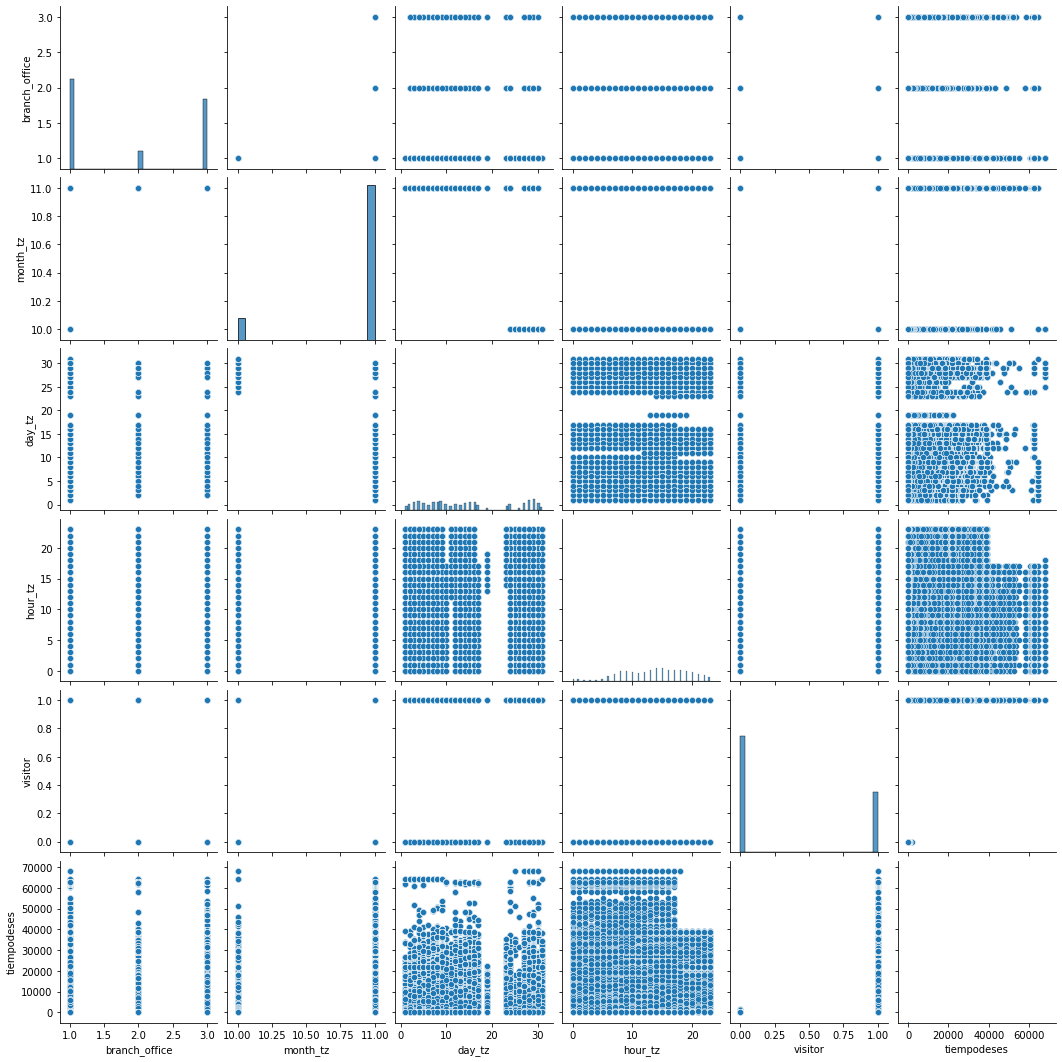

In [33]:
# graficar por pares para encontrar patrones
# ayudo en la identificacion de que es un visitante
sns.pairplot(e)

Observaciones extras:

In [ ]:
# reisar si hay registros para los primeros dias del mes de octubre, puede ser que
# el resultado que muestra mayor actividad en noviembre se deba a que no hay registros de los
# primeros dias de octubre, mas que a un comportamiento en los usuarios
# tambien se muestra que para el mes de octubre solo la primera estacion tiene registros
# ¿ no hay registros para octubre en las otras dos estaciones? ¿ por que?
# esto tambien afecta en las comparaciones, debido a que solo puedo hacerlas entre las
# estaciones cuya info este disponible
# que pasa cerca del dia 21 del mes que no hay registros ?
# en los ultimos dias del mes es cuando los usuarios pasan mas tiempo en sus sesiones
# las sesiones se concentran en un horario por la tarde, no suelen estar conectados 
# ni tan temprano, ni tan noche
# lo que hace que se sea un visitante es haberse conectado o haber tenido una sesion
# de mas de 0 segundos
# cerca del 50% de los datos de la base son de personas que no tuvieron una sesion, 
# es decir no fueron visitantes

Intente encontrar el patron mediante ML:

Se complico al momento de indicar un conteo de las device_mac. NO FUNCIONO

In [ ]:
import tensorflow as tf

In [ ]:
e = pd.read_csv('e.csv') # no hay ruta a mi pc
# porque se añade directamente el .csv a google

In [ ]:
sesion = e.tiempodeses
visitante = e.visitor

In [ ]:
capa = tf.keras.layers.Dense(units = 2, input_shape = [1], activation=  'sigmoid')
# use sigmoid porque necesito una clasificacion entre 
# es visitante, no es visitante

In [ ]:
modelo = tf.keras.Sequential([capa])

In [ ]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.44), 
    loss = 'mean_squared_error',
    metrics = 'accuracy'
)

In [ ]:
print('inicia el entrenamiento del modelo')
historial = modelo.fit(sesion, visitante, epochs = 10, verbose = True)
print('el modelo ha sido entrenado')

In [ ]:
print('voy a hacer una prediccion con mi modelo entrenado:')
resultado = modelo.predict([1])
print('cuando la entrada es mayor que 0 la prediccion es: ', resultado)
resultado = modelo.predict([0])
print('cuando la entrada es 0, la prediccion es: ', resultado)

# no funciono correctamente, me tuvo que haber regresado dos numeros entre [0,1]
# que indican la probabilidad de que sea cierta etiqueta
# cuando se le mete tiempo de sesion >0 deberia dar 
# mayor probabilidad a la etiqueta visitante
# mismo proceso para el otro caso, cuando el tiempo
# de sesion es 0, la etiqueta con mayor probabilidad
# deberia ser no visitante

### 